In [1]:
import os
import pandas as pd

import torch
import torch.nn as nn
import torchaudio.transforms as T
import torchvision, torchaudio
import torch.optim as optim
import scipy as sp
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np
import datetime
import matplotlib.pyplot as plt

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda:0


In [2]:
root_dir = os.path.join('/data2', 'WEAR')
'''
Annotations:
    - wear_split_1.json
    - wear_split_2.json
    - wear_split_3.json
'''
annotations_dir = os.path.join(root_dir, 'annotations')
inertial_dir = os.path.join(root_dir, 'raw', 'inertial')
annotations_file = 'wear_split_1.json'

train = True

In [3]:
df_ann1 = pd.read_json(os.path.join(annotations_dir, annotations_file))
df_ann2 = pd.read_json(os.path.join(annotations_dir, 'wear_split_2.json'))
df_ann3 = pd.read_json(os.path.join(annotations_dir, 'wear_split_3.json'))


In [4]:
len(df_ann1), len(df_ann2), len(df_ann3)

(36, 36, 36)

In [5]:
df_ann1

,version,database,label_dict
sbj_6,Wear,"{'subset': 'Training', 'duration': 2503.5, 'fp...",NaN
sbj_7,Wear,"{'subset': 'Training', 'duration': 2853.0, 'fp...",NaN
sbj_8,Wear,"{'subset': 'Training', 'duration': 2495.0, 'fp...",NaN
sbj_9,Wear,"{'subset': 'Training', 'duration': 2166.0, 'fp...",NaN
sbj_10,Wear,"{'subset': 'Training', 'duration': 3985.0, 'fp...",NaN
sbj_11,Wear,"{'subset': 'Training', 'duration': 2222.0, 'fp...",NaN
sbj_12,Wear,"{'subset': 'Training', 'duration': 3270.0, 'fp...",NaN
sbj_13,Wear,"{'subset': 'Training', 'duration': 3978.0, 'fp...",NaN
sbj_14,Wear,"{'subset': 'Training', 'duration': 3201.0, 'fp...",NaN
sbj_15,Wear,"{'subset': 'Training', 'duration': 2603.0, 'fp...",NaN


In [6]:
df_ann2

,version,database,label_dict
sbj_0,Wear,"{'subset': 'Training', 'duration': 2794.5, 'fp...",NaN
sbj_1,Wear,"{'subset': 'Training', 'duration': 2778.0, 'fp...",NaN
sbj_2,Wear,"{'subset': 'Training', 'duration': 3564.0, 'fp...",NaN
sbj_3,Wear,"{'subset': 'Training', 'duration': 4171.0, 'fp...",NaN
sbj_4,Wear,"{'subset': 'Training', 'duration': 3191.5, 'fp...",NaN
sbj_5,Wear,"{'subset': 'Training', 'duration': 2150.5, 'fp...",NaN
sbj_12,Wear,"{'subset': 'Training', 'duration': 3270.0, 'fp...",NaN
sbj_13,Wear,"{'subset': 'Training', 'duration': 3978.0, 'fp...",NaN
sbj_14,Wear,"{'subset': 'Training', 'duration': 3201.0, 'fp...",NaN
sbj_15,Wear,"{'subset': 'Training', 'duration': 2603.0, 'fp...",NaN


In [7]:
df_ann3

,version,database,label_dict
sbj_0,Wear,"{'subset': 'Training', 'duration': 2794.5, 'fp...",NaN
sbj_1,Wear,"{'subset': 'Training', 'duration': 2778.0, 'fp...",NaN
sbj_2,Wear,"{'subset': 'Training', 'duration': 3564.0, 'fp...",NaN
sbj_3,Wear,"{'subset': 'Training', 'duration': 4171.0, 'fp...",NaN
sbj_4,Wear,"{'subset': 'Training', 'duration': 3191.5, 'fp...",NaN
sbj_5,Wear,"{'subset': 'Training', 'duration': 2150.5, 'fp...",NaN
sbj_6,Wear,"{'subset': 'Training', 'duration': 2503.5, 'fp...",NaN
sbj_7,Wear,"{'subset': 'Training', 'duration': 2853.0, 'fp...",NaN
sbj_8,Wear,"{'subset': 'Training', 'duration': 2495.0, 'fp...",NaN
sbj_9,Wear,"{'subset': 'Training', 'duration': 2166.0, 'fp...",NaN


In [8]:
df = df_ann1['database'].iloc[0]
df = pd.DataFrame(df)

In [9]:
df

,subset,duration,fps,annotations
0,Training,2503.5,60.0,"{'label': 'jogging', 'segment': [1.4, 135.42],..."
1,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [184.2, 192.9..."
2,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [198.34, 208...."
3,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [216.06, 224...."
4,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [229.18, 293...."
5,Training,2503.5,60.0,"{'label': 'jogging (sidesteps)', 'segment': [3..."
6,Training,2503.5,60.0,"{'label': 'lunges', 'segment': [447.94, 557.42..."
7,Training,2503.5,60.0,"{'label': 'stretching (hamstrings)', 'segment'..."
8,Training,2503.5,60.0,"{'label': 'stretching (hamstrings)', 'segment'..."
9,Training,2503.5,60.0,"{'label': 'sit-ups', 'segment': [795.18, 871.8..."


In [10]:
df.query('subset == "Training"')

,subset,duration,fps,annotations
0,Training,2503.5,60.0,"{'label': 'jogging', 'segment': [1.4, 135.42],..."
1,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [184.2, 192.9..."
2,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [198.34, 208...."
3,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [216.06, 224...."
4,Training,2503.5,60.0,"{'label': 'push-ups', 'segment': [229.18, 293...."
5,Training,2503.5,60.0,"{'label': 'jogging (sidesteps)', 'segment': [3..."
6,Training,2503.5,60.0,"{'label': 'lunges', 'segment': [447.94, 557.42..."
7,Training,2503.5,60.0,"{'label': 'stretching (hamstrings)', 'segment'..."
8,Training,2503.5,60.0,"{'label': 'stretching (hamstrings)', 'segment'..."
9,Training,2503.5,60.0,"{'label': 'sit-ups', 'segment': [795.18, 871.8..."


# Considerazioni
Gli split 1, 2 e 3 sono la stessa cosa, ma cambiano nel tipo 'training-validation' per fare un 3-fold.

# Feature extraction - IMU

In [4]:
imu_file = 'sbj_6.csv'
sample_rate = 50 #Hz, source
downsampling_rate = 25 #Hz, target
wsize = 5 #seconds
woverlap = 2.5 #seconds


In [5]:
sensors = pd.read_csv(os.path.join(inertial_dir, imu_file))
sensors

,sbj_id,right_arm_acc_x,right_arm_acc_y,right_arm_acc_z,right_leg_acc_x,right_leg_acc_y,right_leg_acc_z,left_leg_acc_x,left_leg_acc_y,left_leg_acc_z,left_arm_acc_x,left_arm_acc_y,left_arm_acc_z,label
0,6,1.593524,1.574549,0.135837,0.979210,-0.002024,0.219380,0.972875,-0.182900,0.132146,-0.878303,0.364527,-0.080320,NaN
1,6,1.386753,1.449216,0.208494,0.983400,-0.008300,0.222170,0.971670,-0.166253,0.132706,-0.885741,0.348946,-0.073694,NaN
2,6,0.940733,0.929687,0.427001,0.988981,-0.000624,0.211941,0.977996,-0.151650,0.137624,-0.896157,0.339760,-0.080647,NaN
3,6,0.808712,0.718191,0.393986,0.983515,0.001741,0.209883,0.984573,-0.131541,0.138182,-0.908666,0.339820,-0.099019,NaN
4,6,0.781217,0.696570,0.317839,0.974999,0.003930,0.218288,0.979229,-0.120654,0.133371,-0.923826,0.341167,-0.115481,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125170,6,0.589562,0.544659,-0.027453,0.658134,0.152171,-0.141987,0.993827,0.164551,0.235146,-0.693385,0.702947,-0.035816,NaN
125171,6,0.629324,0.598786,-0.097328,0.727249,0.127002,-0.124492,0.989941,0.168895,0.208680,-0.684080,0.665280,0.053470,NaN
125172,6,0.634140,0.619944,-0.108397,0.790870,0.075242,-0.100346,0.991035,0.165024,0.213588,-0.624328,0.677375,0.256451,NaN
125173,6,0.588831,0.605543,-0.137979,0.861807,-0.004777,-0.066258,0.978363,0.166772,0.223121,-0.608746,0.767000,0.265496,NaN


In [6]:
right_arm_acc = sensors[['right_arm_acc_x', 'right_arm_acc_y', 'right_arm_acc_z']]
right_arm_acc = torch.tensor(right_arm_acc.values.T, dtype=torch.float32)
right_arm_acc.shape

torch.Size([3, 125175])

In [7]:
import librosa

def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_frames = waveform.shape[0]
    time_axis = torch.arange(0, num_frames) / sr

    ax.plot(time_axis, waveform, linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)

def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(specgram, origin="lower", aspect="auto", interpolation="nearest")

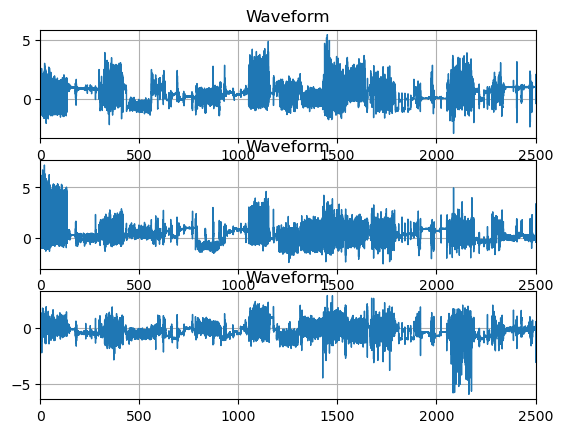

In [8]:
fig, axs = plt.subplots(3,1)
plot_waveform(right_arm_acc[0, :], sample_rate, ax=axs[0])
plot_waveform(right_arm_acc[1, :], sample_rate, ax=axs[1])
plot_waveform(right_arm_acc[2, :], sample_rate, ax=axs[2])
plt.show()

In [16]:
right_arm_acc_resampled = T.Resample(sample_rate, downsampling_rate)(right_arm_acc)
right_arm_acc_resampled.shape, right_arm_acc.shape

(torch.Size([3, 69863]), torch.Size([3, 139725]))

In [17]:
accl_fft = torch.fft.fft(
    right_arm_acc,
    dim=1,
)

In [18]:
def plot_fft(accl_fft):
    # Plotting the real part of accl_fft
    plt.plot(accl_fft.real)
    plt.xlabel('f (Hz)')
    plt.ylabel('|fft(X)|')
    plt.title('Real part of accl_fft')
    plt.show()


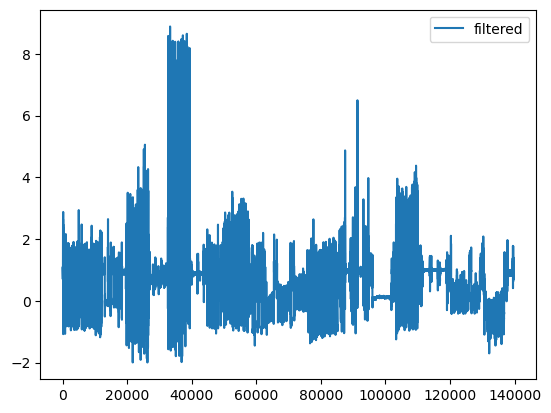

In [19]:
fs = sample_rate
fc = 5  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = sp.signal.butter(5, w, 'low')
output = sp.signal.filtfilt(b, a, right_arm_acc[0].numpy())
plt.plot(output, label='filtered')
plt.legend()
plt.show()

In [20]:
right_arm_acc_x_filtered = torch.from_numpy(np.float32(output).copy())
right_arm_acc_x_filtered.shape

torch.Size([139725])

In [21]:
right_arm_acc_x_filtered.dtype

torch.float32

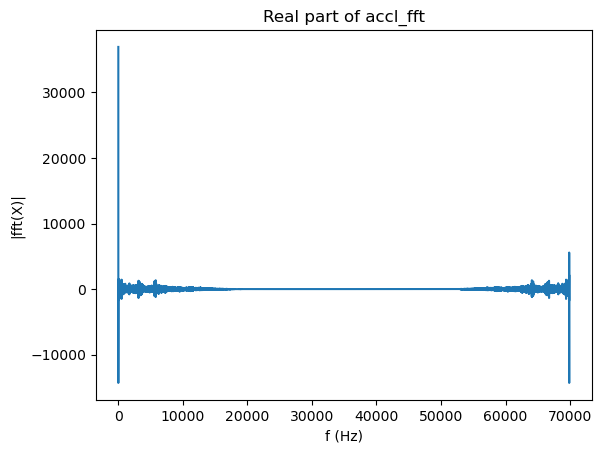

In [22]:
resampled = T.Resample(sample_rate, downsampling_rate)(right_arm_acc_x_filtered)
accl_fft = torch.fft.fft(
    resampled
)
plot_fft(accl_fft)

# Spectrogram

In [9]:
def normalize_tensor(tensor):
    tensor = torch.from_numpy(tensor)
    min_value = torch.min(tensor)
    max_value = torch.max(tensor)
    normalized_tensor = (tensor - min_value) / (max_value - min_value)
    return normalized_tensor

def cut_and_pad(signal, sampling_rate, seconds):
    padded_signal = torch.zeros(sampling_rate * seconds)
    if signal.shape[0] < sampling_rate * seconds:
        padded_signal = torch.zeros(sampling_rate * seconds)
        padded_signal[:signal.shape[0]] = signal
    else:
        padded_signal = signal[:sampling_rate * seconds]

    return padded_signal

In [10]:
focus = 0
sec = 10
prova_2s = right_arm_acc[:, focus:focus + int(sample_rate * sec)]
prova_2s = torchaudio.functional.resample(prova_2s, sample_rate, downsampling_rate)
prova_2s.shape

torch.Size([3, 250])

In [11]:
right_arm_acc.shape

torch.Size([3, 125175])

In [16]:
focus = 0
sec = 10 #FIXME: con 2 e 5 secondi non funziona

prova_2s = right_arm_acc[:, focus:focus + int(sample_rate * sec)]
prova_2s = torchaudio.functional.resample(prova_2s, sample_rate, downsampling_rate)
# prova_2s = accl_x_interp_torch
# prova_2s = normalize_tensor(prova_2s.numpy())
# 

n_ffts = [32, 64, 128, 256]
hop_length = [2, 4, 8, 16]

specs = []
for i, n_fft in enumerate(n_ffts):
    spectrogram = T.Spectrogram(
        n_fft=n_fft,
        hop_length=4,
        center=True,
        pad_mode="reflect",
        power=2.0,
        normalized=True,
    )
    spectrogram.double()

    # 1. spettrogramma
    # 2. da amplitude a dB
    # 3. normalizzare [0,1]
    prova = spectrogram(prova_2s)
    prova = librosa.power_to_db(prova)
    # prova = normalize_tensor(prova)
    specs.append(prova)

In [17]:
for i in range(len(specs)):
    print(specs[i].shape) 

(3, 17, 63)
(3, 33, 63)
(3, 65, 63)
(3, 129, 63)


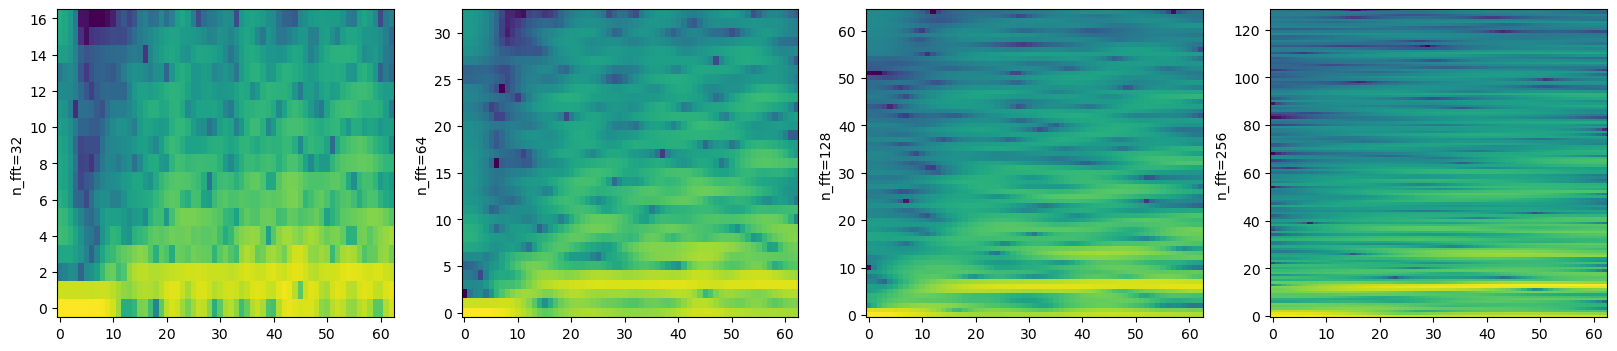

In [18]:
fig, axs = plt.subplots(1, len(specs), figsize=(20,4))
for i, (spec, n_fft) in enumerate(zip(specs, n_ffts)):
    plot_spectrogram(spec[0], ylabel=f"{n_fft=}", ax=axs[i])
    axs[i].set_xlabel(None)

In [19]:
specs[2]

array([[[ 18.03526935,  17.98733729,  17.83864491, ...,   8.90127431,
           8.82052393,   8.77480831],
        [ 13.62944677,  13.61450772,  13.5753054 , ...,   2.25565088,
           2.28207426,   2.32282115],
        [-14.8193582 ,  -9.70063564,  -4.97558492, ..., -27.56303311,
         -27.18600082, -25.76877118],
        ...,
        [-21.84965372, -21.9444377 , -22.23455382, ..., -25.39579045,
         -26.71361902, -27.45888942],
        [-21.87798005, -21.95454792, -22.18231068, ..., -27.85205008,
         -28.38842151, -28.59061302],
        [-21.69581037, -21.78497825, -22.05750216, ..., -30.75481064,
         -29.40293954, -28.91811675]],

       [[ 14.31358194,  14.35068488,  14.49383884, ...,  20.37724927,
          20.40333445,  20.42387204],
        [  6.90972899,   6.95799612,   7.03204722, ...,  14.65299576,
          14.67398102,  14.66350659],
        [-13.72373255, -10.99197453,  -7.21065   , ...,  -8.49624273,
         -10.14776286, -11.39867977],
        ...,


In [29]:
resized_spec = torchvision.transforms.Resize((64, 64))(specs[2])

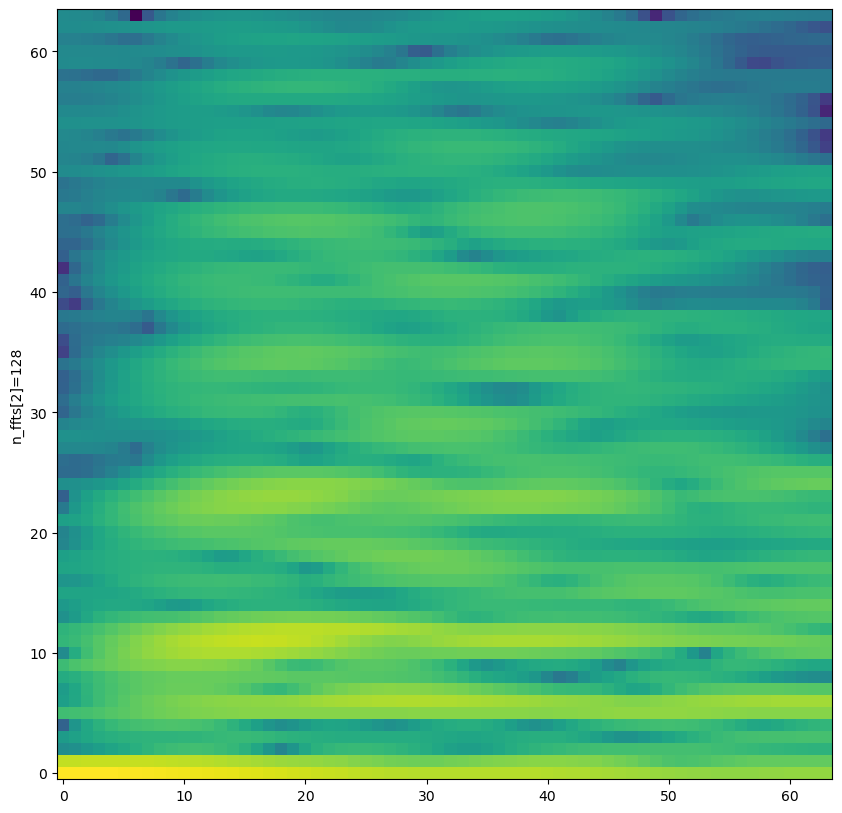

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plot_spectrogram(resized_spec[0], ylabel=f"{n_ffts[2]=}", ax=axs)

# SSL split

Create annotations for SSL split

- window = 10 s
- overlap = 50%

In [100]:
annotations_ssl_wear = 'annotations_ssl_wear.pkl'

df_ssl_wear = pd.DataFrame(columns=[
    'subject',
    'start_s',
    'stop_s'
])

In [98]:
aux = {}

for i, row in df_ann1.iterrows():
    
    if  i.startswith('sbj') and (i not in aux) and (row['database']['subset'] == 'Training'):
        print(i, row['database']['subset'])
        aux[i] = {
            'duration_s': row['database']['duration']
        }


sbj_6 Training
sbj_7 Training
sbj_8 Training
sbj_9 Training
sbj_10 Training
sbj_11 Training
sbj_12 Training
sbj_13 Training
sbj_14 Training
sbj_15 Training
sbj_16 Training
sbj_17 Training


In [41]:
aux

{'sbj_6': {'duration_s': 2503.5},
 'sbj_7': {'duration_s': 2853.0},
 'sbj_8': {'duration_s': 2495.0},
 'sbj_9': {'duration_s': 2166.0},
 'sbj_10': {'duration_s': 3985.0},
 'sbj_11': {'duration_s': 2222.0},
 'sbj_12': {'duration_s': 3270.0},
 'sbj_13': {'duration_s': 3978.0},
 'sbj_14': {'duration_s': 3201.0},
 'sbj_15': {'duration_s': 2603.0},
 'sbj_16': {'duration_s': 3510.0},
 'sbj_17': {'duration_s': 3091.0}}

In [101]:
overlap_in_s = 5
window_size = 10
sampling_rate_accl = 50

for i, row in aux.items():
    duration = row['duration_s']
    n_windows = int((duration * (window_size / overlap_in_s)) / window_size)

    print(f'{i=}, {n_windows=}')

    for j in range(n_windows):
        start = j * overlap_in_s
        stop = start + window_size

        df_ssl_wear.loc[len(df_ssl_wear.index)] = [i, start, stop]
df_ssl_wear

i='sbj_6', n_windows=500
i='sbj_7', n_windows=570
i='sbj_8', n_windows=499
i='sbj_9', n_windows=433
i='sbj_10', n_windows=797
i='sbj_11', n_windows=444
i='sbj_12', n_windows=654
i='sbj_13', n_windows=795
i='sbj_14', n_windows=640
i='sbj_15', n_windows=520
i='sbj_16', n_windows=702
i='sbj_17', n_windows=618


,subject,start_s,stop_s
0,sbj_6,0,10
1,sbj_6,5,15
2,sbj_6,10,20
3,sbj_6,15,25
4,sbj_6,20,30
...,...,...,...
7167,sbj_17,3065,3075
7168,sbj_17,3070,3080
7169,sbj_17,3075,3085
7170,sbj_17,3080,3090


In [92]:
len(df_ssl_wear.query('subject == "sbj_6"'))

12506